# Introducción a la librería PyTorch

[PyTorch](https://pytorch.org)  es una librería de alto nivel para Python que provee:

1. Una clase tensor para hacer cómputo de alto rendimiento con capacidad de auto-diferenciación
1. Un framework para diseñar y entrenar redes neuronales artificiales

En este tutorial revisaremos en detalle como se crean y manipulan los tensoresde PyTorch. En la siguiente lección se revisará el submódulo `torch.nn` para diseñar redes neuronales artificiales.


**Instalación**

Las instrucciones de instalación se encuentra en: https://pytorch.org/get-started/locally/. Sugiero seleccionar la opción para instalar con el manejador de paquetes `conda`. Luego seleccione su sistema operativo y la versión más moderna de CUDA si su computador tiene una GPU Nvidia. En caso contrario seleccione CPU. 

Finalmente utilice el comando sugerido para crear un ambiente de conda. 

:::{seealso}

Si no ha utilizado `conda` anteriormente recomiendo revisar [el siguiente recurso](https://phuijse.github.io/PythonBook/contents/preliminaries/env_management.html#conda).

:::

In [1]:
import torch
torch.__version__

'2.0.1'

## Objeto `Tensor`

La clase [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) es muy similar en uso al `ndarray` de [*NumPy*](https://numpy.org/). Un tensor corresponde a una matriz o arreglo n-dimensional con tipo definido que soporta operaciónes vectoriales de tipo [SIMD](https://es.wikipedia.org/wiki/SIMD) y broadcasting.


<img src="img/tensor.png" width="700">

A continuación revisaremos las operaciones más fundamentales relacionadas a tensores.

**Creación de tensores**

Un tensor puede crearse utilizando funciones constructoras o a partir de listas de Python o *ndarray* de NumPy.

Veamos primero algunas funciones constructoras. Un tensor de largo 10 relleno de ceros se crearía con:

In [2]:
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Un tensor de largo 10 relleno de unos:

In [3]:
torch.ones(10)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Un tensor con 10 números partiendo en cero y terminando en nueve

In [4]:
torch.linspace(0, 9, steps=10)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Un tensor con 10 números aleatorios con distribución normal de media cero y desviación estándar uno:

In [5]:
torch.randn(10)

tensor([-1.4482,  0.0784, -1.3288,  0.6547, -0.3247, -0.9141,  2.2574, -0.2401,
         2.0600, -0.8489])

En cambio, para construir un tensor en base a una lista se utiliza directametne la clase `Tensor` como se muestra a continuación:

In [6]:
una_lista = [0, 1, 2, 3, 4, 5, 6]
torch.Tensor(una_lista)

tensor([0., 1., 2., 3., 4., 5., 6.])

También es posible crear un tensor a partir de un ndarray con la función `from_numpy`:

In [7]:
import numpy as np
numpy_array = np.random.randn(10)
torch.from_numpy(numpy_array)

tensor([ 0.3885,  0.2427, -0.2976,  0.1691, -1.8043, -1.8060,  1.5119, -0.4055,
        -0.2976, -1.3898], dtype=torch.float64)

**De PyTorch a NumPy**

Para convertir un tensor de pytorch a un ndarray de numpy se utiliza el método `numpy()` de los tensores.

In [8]:
data = torch.randn(5)
data

tensor([ 0.9945,  0.6477, -0.2848,  1.5312, -0.0483])

In [9]:
data.numpy()

array([ 0.9944651 ,  0.6476863 , -0.28484747,  1.531183  , -0.04827926],
      dtype=float32)

**Atributos importantes de los tensores**

Un tensor tiene un tamaño (dimesiones) y tipo específico. Esto se consulta con los atributos `ndim`/`shape` y `dtype`, respectivamente:



In [10]:
a = torch.randn(10, 20, 30)
a.ndim, a.shape, a.dtype

(3, torch.Size([10, 20, 30]), torch.float32)

A diferencia de un ndarray, un tensor puede estar alojado en la memoria del sistema ('cpu') o en la memoria de dispositivo coprocesador ('gpu'). La "ubicación" de un tensor se consulta con el atributo `device`:

In [11]:
a.device

device(type='cpu')

Durante la creación de un tensor es posible especificar el tipo y el dispositivo:

In [12]:
a = torch.zeros(10, dtype=torch.int32, device='cpu')
display(a)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

**Manipulación de tensores**

Sea el siguiente tensor de una dimensión:

In [13]:
a = torch.linspace(0, 9, 10)
a

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Podemos reorganizar las dimensiones del tensor con el método `reshape`:

In [14]:
b = a.reshape(2, 5)
b

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

Podemos transponer el método `transpose()` o su alias `T`

In [15]:
b.T

tensor([[0., 5.],
        [1., 6.],
        [2., 7.],
        [3., 8.],
        [4., 9.]])

Podemos convertir un tensor de dimensión arbitraria a uno de una dimensión con `flatten()`

In [16]:
b.flatten()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Podemos agregar una dimensión en una posición arbitraria con `unsqueeze(d)`

In [17]:
c = b.unsqueeze(1)
c, c.shape

(tensor([[[0., 1., 2., 3., 4.]],
 
         [[5., 6., 7., 8., 9.]]]),
 torch.Size([2, 1, 5]))

**Cálculos con tensores**

Un tensor soporta operaciones aritméticas y lógicas.

Sea el siguiente tensor:

In [18]:
data = torch.linspace(0, 5, steps=6)
data

tensor([0., 1., 2., 3., 4., 5.])

A continuación se muestra algunos ejemplos de operaciones aritméticas. 

:::{note}

Las operaciones o funciones son *element-wise*, es decir que se aplican a todos los elementos del tensor.

:::

In [19]:
data + 5

tensor([ 5.,  6.,  7.,  8.,  9., 10.])

In [20]:
2*data

tensor([ 0.,  2.,  4.,  6.,  8., 10.])

In [21]:
data.pow(2)

tensor([ 0.,  1.,  4.,  9., 16., 25.])

In [22]:
data.log()

tensor([  -inf, 0.0000, 0.6931, 1.0986, 1.3863, 1.6094])

Una operación lógica puede utilizarse para filtrar un tensor, como se muestra a continuación:

In [23]:
mask = data > 3
mask

tensor([False, False, False, False,  True,  True])

In [24]:
data[mask]

tensor([4., 5.])

Los tensores también soportan *broadcasting*, es decir que podemos operar tensores de distinto tamaño siempre y cuando se cumplan algunas reglas. 

Considere el siguiente ejemplo de un vector columna de 6 elementos que se multiplica a un vector fila de 6 elementos para obtener una matriz de 6x6:

In [25]:
data2 = torch.ones(6)
data.unsqueeze(1), data2.unsqueeze(0), data.unsqueeze(1)*data2.unsqueeze(0)

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.]]),
 tensor([[1., 1., 1., 1., 1., 1.]]),
 tensor([[0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1.],
         [2., 2., 2., 2., 2., 2.],
         [3., 3., 3., 3., 3., 3.],
         [4., 4., 4., 4., 4., 4.],
         [5., 5., 5., 5., 5., 5.]]))

**Cálculos en GPU**

Usando el atributo `to` podemos intercambiar un tensor entre memoría de GPU ('device') y CPU ('host') o viceversa:

```python
data = torch.zeros(10)
data = data.to('cuda')
```

:::{important}

Cuando todos los tensores involucrados en una operaciones están en memoria de dispositivo entonces las cómputos que aplicamos al tensor los realiza la GPU.

:::

La siguiente nota indica las opciones para intercambiar datos entre GPU y CPU que ofrece PyTorch: https://pytorch.org/docs/stable/notes/cuda.html 

:::{note}

Una *Graphical Processing Unit* (GPU) o tarjeta de video es un hardware para hacer cálculos sobre mallas tridimensionales, generación de imágenes (rendering) y otras tareas gráficas. A diferencia de la CPU, la GPU es especialista en cálculo paralelo y tiene miles de nucleos (NVIDIA RTX 2080: 2944 nucleos).

:::



## Auto-diferenciación con Tensores

En general, las redes neuronales artificiales se entrenan usando **Gradiente Descedente**. Por lo tanto necesitamos calcular las derivadas de la función de costo para todos los parámetros de la red.

PyTorch tiene incorporado un sistema de diferenciación automática denominado [`autograd`](https://pytorch.org/docs/stable/autograd.html). Para poder derivar una función en pytorch:

1. Se necesita que su entrada sean tensores con el atributo `requires_grad=True`
1. Luego llamamos la función `backward()` de la función
1. El resultado queda guardado en el atributo `grad` de la entrada (nodo hoja)

**Ejemplos**

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt

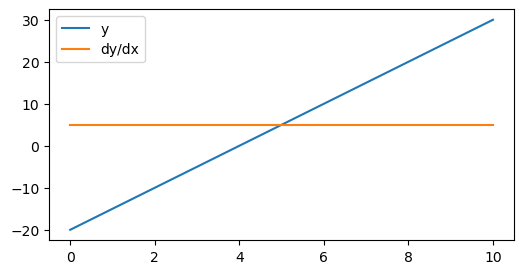

In [27]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True)
y = 5*x - 20
y.backward(torch.ones_like(x))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
plt.legend();

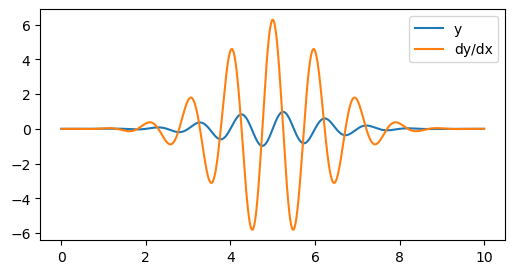

In [28]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True)
y = torch.sin(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3)
y.backward(torch.ones_like(x))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
plt.legend();

Comparado con la derivada calculada "a mano":

In [29]:
dydx = 2*torch.pi*torch.cos(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3) - 2/3*(x-5)*torch.sin(2.0*np.pi*x)*torch.exp(-(x-5).pow(2)/3)
torch.allclose(x.grad.detach(), dydx)

True

## Grafo de cómputo

Cuando concatenamos operacionesm PyTorch construye internamente un "grafo de cómputo"

$$
x \to z = f_1(x) \to y = f_2(z)
$$

El método `backward()` calcula los gradientes y los almacena en los nodo hoja que tengan `requires_grad=True`

Por ejemplo

    y.backward : Guarda dy/dx en x.grad
    
    z.backward : Guarda dz/dx en x.grad

:::{note}

`backward()` implementa la regla de la cadena de las derivadas

:::

`backward` recibe una entrada: La derivada de la etapa superior de la cadena. Por defecto usa `torch.ones([1])`, es decir que asume que está en el nivel superior del grafo y que la salida es escalar (unidimensional)

In [30]:
x = torch.linspace(0, 10, steps=1000, requires_grad=True) # Nodo hoja
x.grad_fn

In [31]:
z = torch.sin(2*x)
z.grad_fn

In [32]:
y = z.pow(2)/2
y.grad_fn

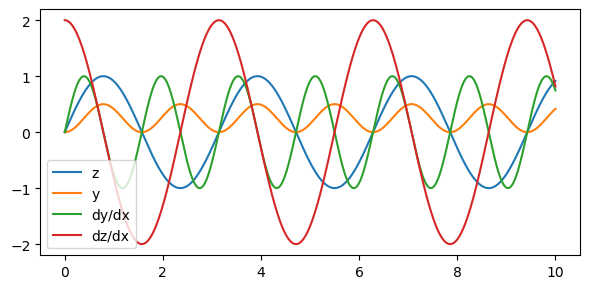

In [33]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(x.detach().numpy(), z.detach().numpy(), label='z')
ax.plot(x.detach().numpy(), y.detach().numpy(), label='y')
# Derivada dy/dx
y.backward(torch.ones_like(x), retain_graph=True)
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dy/dx')
# Borro el resultado en x.grad
x.grad = None
# Derivada dz/dx
z.backward(torch.ones_like(x))
ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dz/dx')
plt.legend();

:::{note}

El método `detach()` retorna una copia del tensor que se ha "despegado" del grafo

:::